In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

#from skbio.stats.composition import clr
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

try:
    from unumHelpers import notSig
except ModuleNotFoundError as e:
    print(e)

def color_big_red(val):
    color = 'red' if abs(val) >0.4 else 'black'
    return 'color: %s' % color

No module named 'unumHelpers'


## Data 

In [2]:
data = pd.read_excel('2020_CO_terms_cleaned.xlsx')

In [3]:
data.shape

(7795, 256)

In [4]:
data.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
0,0,% of people,Electability,NaN,0.000016,NaN,NaN,0.000010,NaN,NaN,...,NaN,0.000011,0.000013,NaN,NaN,0.000010,0.000011,0.000012,NaN,0.000012
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,NaN,NaN,NaN,0.000011,...,0.000013,0.000011,NaN,0.000039,NaN,0.000010,0.000024,0.000012,0.000011,0.000012
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000069,0.000047,0.000043,0.000043,0.000045,0.000031,0.000024,0.000051,0.000066,0.000045
3,3,10 women,Social Equality,0.000010,NaN,0.000019,0.000012,NaN,0.000011,0.000011,...,0.000013,NaN,0.000013,NaN,NaN,0.000010,0.000011,0.000012,0.000011,NaN
4,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,NaN,NaN


In [5]:
data[['Category', 'Term']].groupby('Category').count()

,Term
Category,
Agriculture,52
Campaign Finance,45
Congress,275
Conspiracy,41
Corporate Regulation,51
Criminal Justice,323
Cybersecurity,23
Economy,1221
Education,285


In [6]:
# Setting up variables for each category.
# Not used but may be helpful
conspiracy = data[data['Category'].isin(['Conspiracy', 'Mueller/Russia'])]
corpreg_econ = data[data['Category'].isin(['Corporate Regulation','Economy'])]
crime = data[data['Category'].isin(['Criminal Justice', 'Public Safety', 'Guns'])]
Health= data[data['Category'].isin([ 'Healthcare'])]
education = data[data['Category'].isin(['Education'])]
electability = data[data['Category'].isin(['Electability'])]
environment = data[data['Category'].isin(['Environmental'])]
ethics = data[data['Category'].isin(['Ethics/Morals'])]
immigration = data[data['Category'].isin(['Immigration'])]
impeachment = data[data['Category'].isin(['Impeachment'])]
law_gov = data[data['Category'].isin(['Campaign Finance', 'Judiciary Branch', 'Generic Policy Queries', 'Voter Turnout', 'Election Security', 'Congress', 'Cybersecurity'])]
media = data[data['Category'].isin(['Media'])]
religion = data[data['Category'].isin(['Religion'])]
rephealth = data[data['Category'].isin(['Reproductive Health'])]
soceq = data[data['Category'].isin(['Social Equality'])]
taxes = data[data['Category'].isin(['Taxes/Spending'])]
trade_ag = data[data['Category'].isin(['Trade', 'Agriculture'])]
war = data[data['Category'].isin(['War'])]

In [7]:
corpreg_econ.shape

(1272, 256)

In [8]:
corpreg_econ.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
4,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,NaN,NaN
10,10,12+ hour days,Economy,0.000454,0.000449,0.000685,0.000612,0.000491,0.000571,0.000460,...,0.000684,0.000475,0.000553,0.000606,0.000676,0.000472,0.000486,0.000621,0.000537,0.000454
11,11,15 minimum,Economy,0.000049,0.000046,0.000045,0.000027,0.000028,0.000041,0.000031,...,0.000019,0.000023,0.000030,0.000040,0.000031,0.000008,0.000008,0.000044,0.000008,0.000009
12,12,15 minimum wage,Economy,0.000027,0.000058,0.000048,0.000053,0.000017,0.000043,0.000049,...,0.000019,0.000011,0.000014,0.000056,0.000043,0.000037,0.000019,0.000017,0.000012,0.000013
14,15,1st quarter,Economy,NaN,NaN,NaN,NaN,NaN,0.000012,NaN,...,NaN,NaN,0.000014,NaN,NaN,NaN,0.000019,NaN,NaN,NaN


In [9]:
data.columns

Index([       'Unnamed: 0',              'Term',          'Category',
       2019-02-15 00:00:00, 2019-02-16 00:00:00, 2019-02-17 00:00:00,
       2019-02-18 00:00:00, 2019-02-19 00:00:00, 2019-02-20 00:00:00,
       2019-02-21 00:00:00,
       ...
       2019-10-16 00:00:00, 2019-10-17 00:00:00, 2019-10-18 00:00:00,
       2019-10-19 00:00:00, 2019-10-20 00:00:00, 2019-10-21 00:00:00,
       2019-10-22 00:00:00, 2019-10-23 00:00:00, 2019-10-24 00:00:00,
       2019-10-25 00:00:00],
      dtype='object', length=256)

In [10]:
data.head()

,Unnamed: 0,Term,Category,2019-02-15 00:00:00,2019-02-16 00:00:00,2019-02-17 00:00:00,2019-02-18 00:00:00,2019-02-19 00:00:00,2019-02-20 00:00:00,2019-02-21 00:00:00,...,2019-10-16 00:00:00,2019-10-17 00:00:00,2019-10-18 00:00:00,2019-10-19 00:00:00,2019-10-20 00:00:00,2019-10-21 00:00:00,2019-10-22 00:00:00,2019-10-23 00:00:00,2019-10-24 00:00:00,2019-10-25 00:00:00
0,0,% of people,Electability,NaN,0.000016,NaN,NaN,0.000010,NaN,NaN,...,NaN,0.000011,0.000013,NaN,NaN,0.000010,0.000011,0.000012,NaN,0.000012
1,1,1 diabetes,Healthcare,0.000014,0.000016,0.000019,NaN,NaN,NaN,0.000011,...,0.000013,0.000011,NaN,0.000039,NaN,0.000010,0.000024,0.000012,0.000011,0.000012
2,2,1 president,Electability,0.000031,0.000035,0.000075,0.000071,0.000041,0.000077,0.000029,...,0.000069,0.000047,0.000043,0.000043,0.000045,0.000031,0.000024,0.000051,0.000066,0.000045
3,3,10 women,Social Equality,0.000010,NaN,0.000019,0.000012,NaN,0.000011,0.000011,...,0.000013,NaN,0.000013,NaN,NaN,0.000010,0.000011,0.000012,0.000011,NaN
4,4,100 homes,Economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000009,NaN,NaN


# PCA
#### Run if PCA has not already been done

In [11]:
df = data.drop(columns={"Term"}).fillna(0).groupby('Category').mean().T
df.drop(columns={'Space','Impeachment','State/Local'},inplace=True)
df['tot'] = df.sum(axis=1)
for i in df.columns:
    df[i] = df[i] / df.tot
df.drop(columns={'tot'},inplace=True)

In [12]:
fa = FactorAnalyzer(n_factors=14, rotation='varimax')
fa.fit(df)

factors = pd.DataFrame(fa.loadings_, index=list(df.columns)).style.applymap(color_big_red)
factors

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Agriculture,-0.0628323,0.3744,0.475429,0.167006,0.252177,-0.0546153,-0.279372,-0.0764041,0.0130002,0.00570789,0.0776132,-0.0890795,-0.313563,0.044367
Campaign Finance,0.037414,-0.169084,0.902129,0.0470815,0.128122,-0.00400608,0.0117808,0.0402663,0.0207064,-0.00535654,0.120909,-0.030073,-0.0732163,0.0417309
Congress,-0.0730055,-0.140773,0.0382837,0.214534,0.00276129,0.811346,-0.0437348,0.092268,0.0774573,-0.0477662,0.0896503,0.0329416,-0.0328405,-0.0289635
Conspiracy,-0.0435097,0.0355364,0.718414,-0.0646229,0.233174,0.0527747,0.0332687,-0.0344871,-0.00800874,-0.0525312,0.0795325,-0.0587882,0.0321927,-0.0719299
Corporate Regulation,0.712967,0.105027,-0.238322,-0.0382244,-0.0935526,0.0485181,0.164227,0.0653425,0.0060309,-0.000632268,0.0777414,0.0298877,-0.0972043,0.0911714
Criminal Justice,0.593134,0.382282,-0.425443,-0.012851,-0.0945741,-0.0498376,-0.0727003,0.0854282,0.0679777,-0.151712,-0.0648699,0.00862016,0.420718,0.0278271
Cybersecurity,0.705959,-0.0219999,0.313669,0.0459245,-0.0218896,-0.111971,-0.173711,0.0111978,0.0599417,-0.0214846,0.0654747,0.10199,-0.0136295,-0.0196925
Economy,0.891186,0.0827521,-5.38088e-05,0.0489924,-0.114528,-0.0966221,0.181445,0.0943628,0.0276341,-0.0209828,-0.024441,0.0244574,0.207911,0.0119409
Education,0.228841,-0.0761083,-0.0175178,0.60629,0.00852944,0.101729,0.0232036,-0.078294,0.235719,-0.0685225,0.230791,0.048589,0.0363084,0.179926
Electability,-0.156415,0.229553,0.41259,-0.146464,0.0709357,0.511154,0.108067,-0.0105693,0.0726674,-0.0626777,0.301266,0.20532,0.0929843,0.0861727


In [13]:
fa.get_factor_variance()

(array([4.82739813, 3.55213999, 3.23478092, 1.5491922 , 1.49257237,
        1.39758377, 1.22075326, 1.21737793, 1.18775311, 1.11097459,
        1.08629329, 0.79898288, 0.53459331, 0.44023809]),
 array([0.16091327, 0.11840467, 0.10782603, 0.05163974, 0.04975241,
        0.04658613, 0.04069178, 0.04057926, 0.03959177, 0.03703249,
        0.03620978, 0.02663276, 0.01781978, 0.0146746 ]),
 array([0.16091327, 0.27931794, 0.38714397, 0.43878371, 0.48853612,
        0.53512225, 0.57581402, 0.61639329, 0.65598506, 0.69301754,
        0.72922732, 0.75586008, 0.77367986, 0.78835446]))

## Map data to PCA Categories and include dependents

In [14]:
# PCA Category Mappings and Dependent variable files
pca_cats = pd.read_excel('2020 Dems Category Mapping.xlsx')
dependents = pd.read_excel('2020 Dependent.xlsx')

In [15]:
dependents = dependents.rename(columns = {'Unnamed: 0':'Date'})

In [16]:
dependents.head()

,Date,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.432308,0.567692,0.474318,0.525682


In [17]:
reg_df = pd.merge(data,pca_cats,on='Category',how='left').drop(["Term"],axis = 1).groupby('Component').sum().T
reg_df = reg_df.drop('Unnamed: 0', axis = 0)
reg_df = reg_df.reset_index().rename(columns={'index':'Date'})
reg_df['Date'] = pd.to_datetime(reg_df['Date'], infer_datetime_format=True)
reg_df = pd.merge(reg_df,dependents,on='Date',how='inner')
reg_df = reg_df.fillna(0)

In [18]:
# reg_df will be the clean dataframe used for modeling
reg_df.head()

,Date,CampFin,Conspiracy_Mueller,CorpReg_Econ,Crime,Educ,Electability,Environment,Ethics,Healthcare,...,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-15,0.000776,0.004206,0.154362,0.219928,0.029705,0.061096,0.037586,0.032957,0.048001,...,0.004037,0.007075,0.058774,0.023726,0.004467,0.140730,0.431907,0.568093,0.474177,0.525823
1,2019-02-16,0.000638,0.004445,0.140936,0.242137,0.028506,0.059117,0.043945,0.032064,0.044086,...,0.004946,0.008465,0.053539,0.017772,0.004710,0.141114,0.431490,0.568510,0.474032,0.525968
2,2019-02-17,0.000895,0.005039,0.145267,0.233961,0.030081,0.061979,0.047618,0.034719,0.044451,...,0.006403,0.009092,0.061219,0.015341,0.004678,0.130628,0.430931,0.569069,0.473836,0.526164
3,2019-02-18,0.000745,0.004362,0.159947,0.221232,0.032424,0.063675,0.044322,0.036037,0.060637,...,0.004766,0.008894,0.063000,0.015696,0.004674,0.122725,0.430737,0.569263,0.473768,0.526232
4,2019-02-19,0.000924,0.004612,0.163674,0.216902,0.035227,0.070021,0.041438,0.037029,0.050773,...,0.003769,0.007941,0.062957,0.014296,0.004691,0.117827,0.432308,0.567692,0.474318,0.525682


In [19]:
reg_df.columns

Index(['Date', 'CampFin', 'Conspiracy_Mueller', 'CorpReg_Econ', 'Crime',
       'Educ', 'Electability', 'Environment', 'Ethics', 'Healthcare',
       'Immigration', 'Impeachment', 'Law_Govt', 'Media', 'Religion',
       'ReprHealth', 'SocEq', 'Taxes', 'Trade_Agr', 'War', 'Hickenlooper_raw',
       'Gardner_raw', 'Hickenlooper_adj', 'Gardner_adj'],
      dtype='object')

# Line plots for each variable
#### Identify spikes and unusual behavior

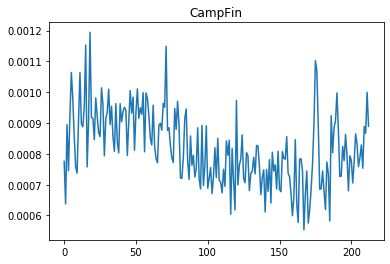

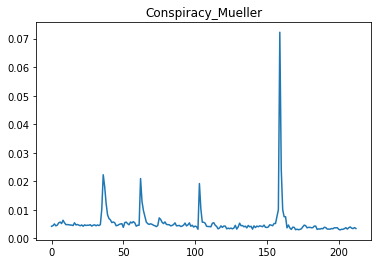

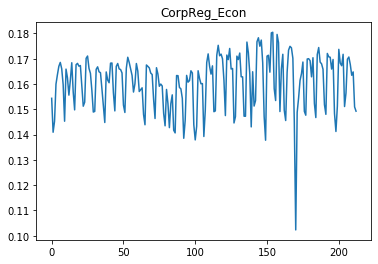

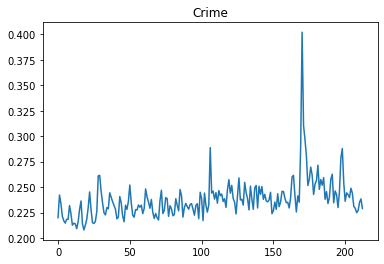

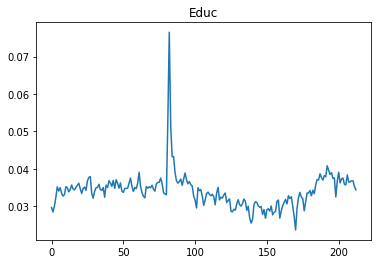

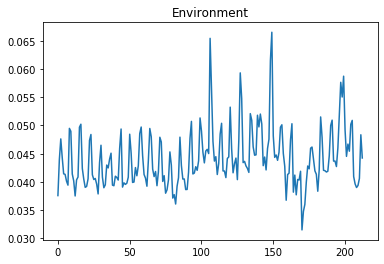

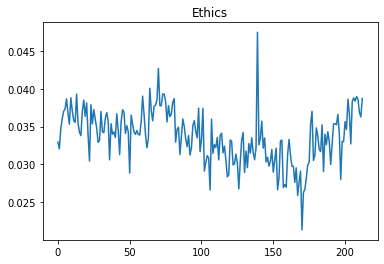

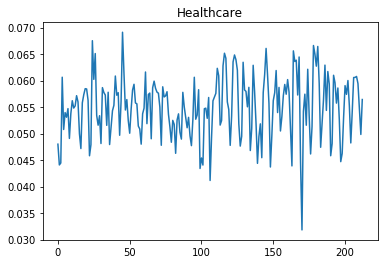

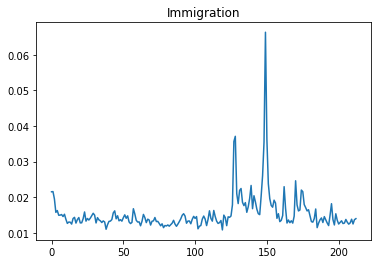

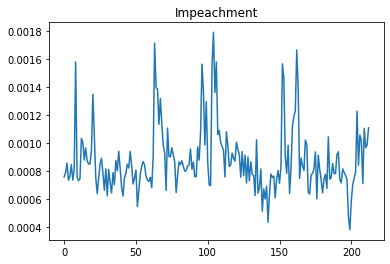

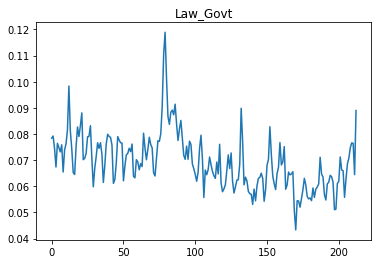

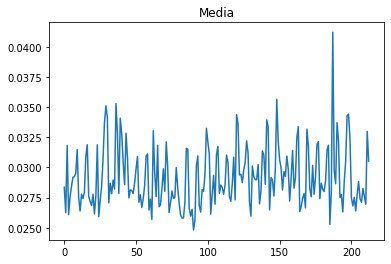

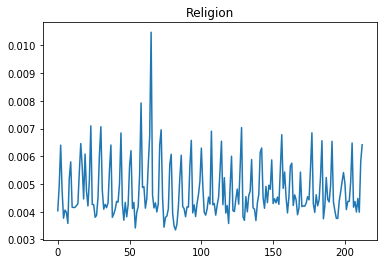

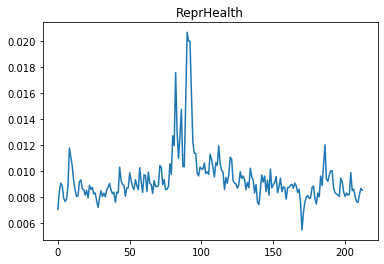

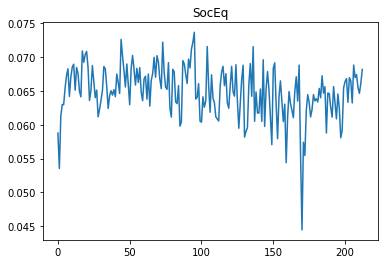

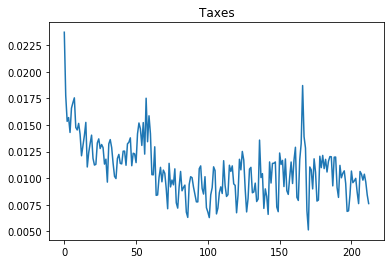

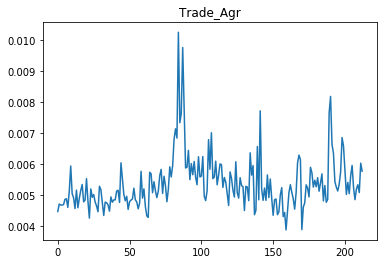

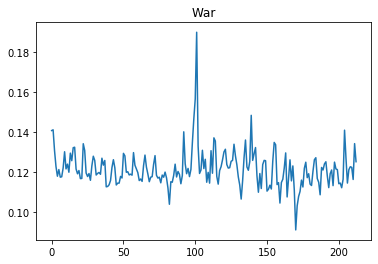

In [21]:
#Original data, no roll
reg_df_date = reg_df.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
reg_cols = reg_df_date.columns
for i in reg_cols: 
    plt.plot(reg_df_date[i])
    plt.title(i)
    plt.show()

# Histograms
#### Distribution of each variable

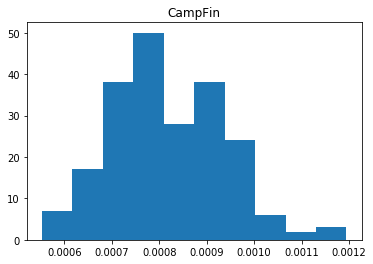

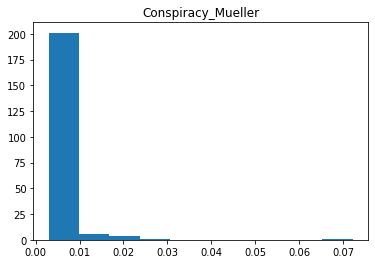

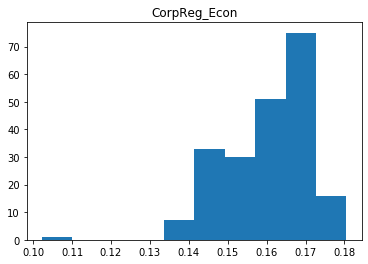

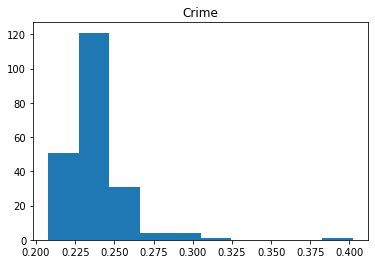

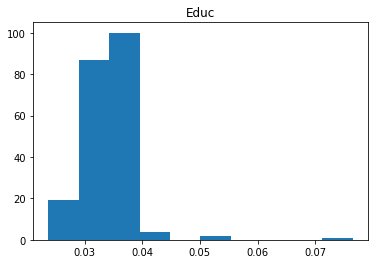

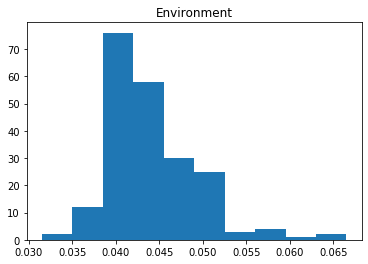

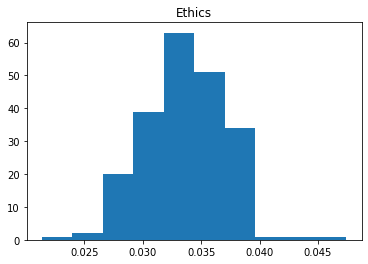

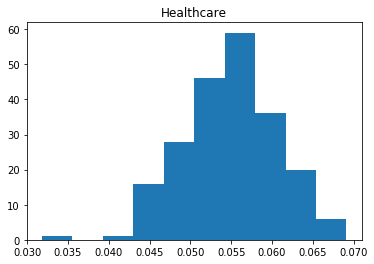

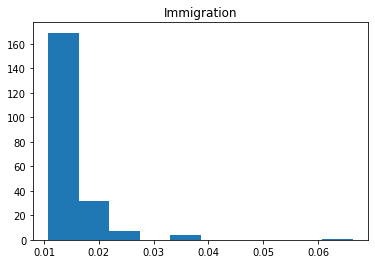

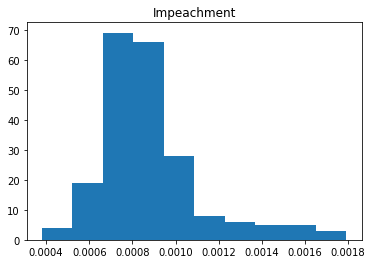

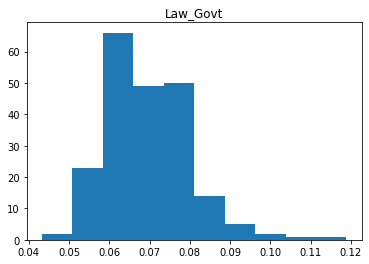

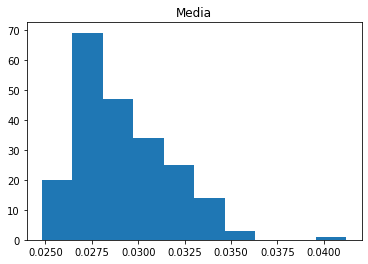

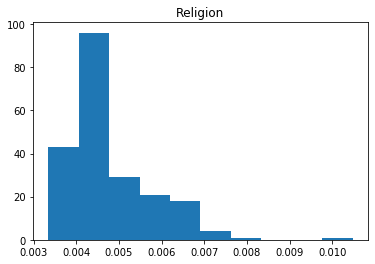

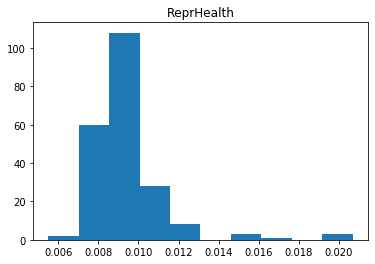

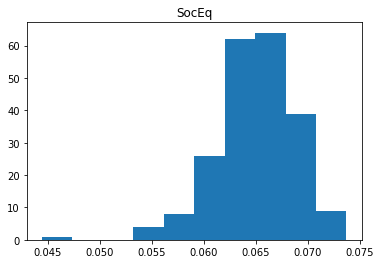

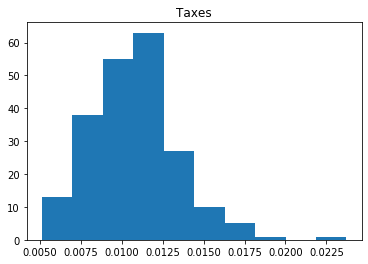

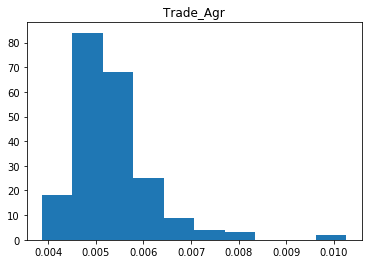

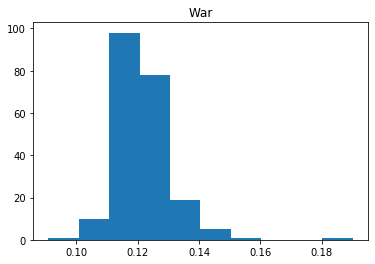

In [22]:
for i in reg_cols:
    plt.hist(reg_df_date[i])
    plt.title(i)
    plt.show()

# Rolling data
#### Use if you want to take a rolling average of the data

In [23]:
### rolling number give you a more steady average in term of weekly, 

In [24]:
roll_3 = reg_df.set_index(['Date'])
roll_3 = roll_3.rolling(3).mean()
roll_3 = roll_3.dropna()
roll_3 = roll_3.reset_index()
roll_3.head()

,Date,CampFin,Conspiracy_Mueller,CorpReg_Econ,Crime,Educ,Electability,Environment,Ethics,Healthcare,...,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War,Hickenlooper_raw,Gardner_raw,Hickenlooper_adj,Gardner_adj
0,2019-02-17,0.000769,0.004563,0.146855,0.232009,0.029431,0.060730,0.043050,0.033247,0.045513,...,0.005129,0.008211,0.057844,0.018946,0.004618,0.137491,0.431443,0.568557,0.474015,0.525985
1,2019-02-18,0.000759,0.004615,0.148717,0.232443,0.030337,0.061590,0.045295,0.034273,0.049725,...,0.005372,0.008817,0.059253,0.016270,0.004687,0.131489,0.431053,0.568947,0.473878,0.526122
2,2019-02-19,0.000855,0.004671,0.156296,0.224032,0.032577,0.065225,0.044459,0.035928,0.051954,...,0.004979,0.008642,0.062392,0.015111,0.004681,0.123727,0.431325,0.568675,0.473974,0.526026
3,2019-02-20,0.000911,0.004799,0.163545,0.217572,0.033917,0.064029,0.042369,0.036802,0.055124,...,0.004198,0.008171,0.063800,0.015524,0.004742,0.120570,0.431514,0.568486,0.474040,0.525960
4,2019-02-21,0.000989,0.005239,0.166415,0.216606,0.034774,0.061365,0.040973,0.037681,0.052608,...,0.003937,0.007832,0.065236,0.015990,0.004810,0.118776,0.431714,0.568286,0.474110,0.525890


In [25]:
##Line plots for each variable after rolling data 
## Identify spikes and unusual behavior after rolling data 

In [26]:
roll_plot = roll_3.drop(['Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'], axis = 1)
roll_plot_cols = roll_plot.columns


In [27]:
roll_plot_cols

Index(['CampFin', 'Conspiracy_Mueller', 'CorpReg_Econ', 'Crime', 'Educ',
       'Environment', 'Ethics', 'Healthcare', 'Immigration', 'Impeachment',
       'Law_Govt', 'Media', 'Religion', 'ReprHealth', 'SocEq', 'Taxes',
       'Trade_Agr', 'War'],
      dtype='object')

# Rolling Train/Test and data exploration
#### Replace X variables dataframe with non rolled version if necessary

In [28]:
roll_3.columns

Index(['Date', 'CampFin', 'Conspiracy_Mueller', 'CorpReg_Econ', 'Crime',
       'Educ', 'Electability', 'Environment', 'Ethics', 'Healthcare',
       'Immigration', 'Impeachment', 'Law_Govt', 'Media', 'Religion',
       'ReprHealth', 'SocEq', 'Taxes', 'Trade_Agr', 'War', 'Hickenlooper_raw',
       'Gardner_raw', 'Hickenlooper_adj', 'Gardner_adj'],
      dtype='object')

In [29]:
# if not rolling data, rename this variable and replace throughout 
# x = reg_df.drop(...)
x_3 = roll_3.drop(columns={'Date','Hickenlooper_raw','Hickenlooper_adj' ,'Gardner_raw','Gardner_adj','Electability'})

Hickenlooper_adj = roll_3['Hickenlooper_adj']
Gardner_adj = roll_3['Gardner_adj']



x_train_Hickenlooper_adj, x_test_Hickenlooper_adj, y_train_Hickenlooper_adj, y_test_Hickenlooper_adj = train_test_split(x_3, Hickenlooper_adj, test_size=0.3, random_state=42)
x_train_Gardner_adj, x_test_Gardner_adj, y_train_Gardner_adj, y_test_Gardner_adj = train_test_split(x_3, Gardner_adj, test_size=0.3, random_state=42)

In [30]:
x_3.head()

,CampFin,Conspiracy_Mueller,CorpReg_Econ,Crime,Educ,Environment,Ethics,Healthcare,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
0,0.000769,0.004563,0.146855,0.232009,0.029431,0.043050,0.033247,0.045513,0.020866,0.000803,0.077376,0.028813,0.005129,0.008211,0.057844,0.018946,0.004618,0.137491
1,0.000759,0.004615,0.148717,0.232443,0.030337,0.045295,0.034273,0.049725,0.018938,0.000795,0.073700,0.028056,0.005372,0.008817,0.059253,0.016270,0.004687,0.131489
2,0.000855,0.004671,0.156296,0.224032,0.032577,0.044459,0.035928,0.051954,0.017158,0.000787,0.072767,0.028484,0.004979,0.008642,0.062392,0.015111,0.004681,0.123727
3,0.000911,0.004799,0.163545,0.217572,0.033917,0.042369,0.036802,0.055124,0.015632,0.000783,0.072881,0.027347,0.004198,0.008171,0.063800,0.015524,0.004742,0.120570
4,0.000989,0.005239,0.166415,0.216606,0.034774,0.040973,0.037681,0.052608,0.015374,0.000783,0.074812,0.028382,0.003937,0.007832,0.065236,0.015990,0.004810,0.118776


### Train Test random split

In [31]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_train_Hickenlooper_adj, y_train_Hickenlooper_adj)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_train_Hickenlooper_adj)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_test_Hickenlooper_adj)
print('Hickenlooper_adj:: Train:', round(r2_score(y_train_Hickenlooper_adj,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(y_test_Hickenlooper_adj,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_train_Gardner_adj, y_train_Gardner_adj)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_train_Gardner_adj)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_test_Gardner_adj)
print('Gardner_adj:: Train:', round(r2_score(y_train_Gardner_adj,pred_train_Gardner_adj),3),' Test:', round(r2_score(y_test_Gardner_adj,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.606  Test: 0.456
Gardner_adj:: Train: 0.606  Test: 0.456


### Train Test chronological split

In [32]:
Hickenlooper_adj_train = roll_3['Hickenlooper_adj'][:200]
Gardner_adj_train = roll_3['Gardner_adj'][:200]

Hickenlooper_adj_test = roll_3['Hickenlooper_adj'][200:]
Gardner_adj_test = roll_3['Gardner_adj'][200:]

x_3_train = x_3[:200]
x_3_test = x_3[200:]

In [33]:
x_3_test

,CampFin,Conspiracy_Mueller,CorpReg_Econ,Crime,Educ,Environment,Ethics,Healthcare,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
200,0.000753,0.003086,0.169750,0.240956,0.037571,0.046822,0.036288,0.058820,0.012912,0.000681,0.066455,0.027267,0.004492,0.008192,0.065511,0.009990,0.005403,0.113500
201,0.000782,0.003082,0.169097,0.242165,0.037051,0.045555,0.036638,0.057544,0.012958,0.000750,0.067788,0.026904,0.004276,0.008247,0.065704,0.009762,0.005156,0.114258
202,0.000824,0.003228,0.163371,0.243689,0.036920,0.047447,0.036002,0.054488,0.012894,0.000924,0.062638,0.027224,0.004606,0.008767,0.065594,0.009464,0.005356,0.123103
203,0.000818,0.003419,0.159770,0.244174,0.036393,0.048845,0.035900,0.052527,0.013021,0.000955,0.061468,0.027663,0.005308,0.008885,0.065562,0.008750,0.005539,0.128043
204,0.000792,0.003446,0.159125,0.241294,0.036673,0.047350,0.036598,0.054314,0.013145,0.001043,0.062342,0.027998,0.005238,0.009017,0.066183,0.008965,0.005604,0.127394
205,0.000792,0.003553,0.165654,0.234701,0.036879,0.043833,0.038482,0.058435,0.013048,0.000974,0.067346,0.027781,0.005005,0.008409,0.066346,0.009531,0.005349,0.120787
206,0.000790,0.003639,0.169420,0.228314,0.037141,0.039871,0.038701,0.060654,0.012725,0.000930,0.071353,0.027588,0.004175,0.008131,0.067744,0.010268,0.005093,0.119354
207,0.000824,0.003750,0.167301,0.226908,0.036628,0.039343,0.038638,0.060268,0.013004,0.000947,0.074035,0.027656,0.004280,0.007791,0.066640,0.010183,0.005123,0.121986
208,0.000836,0.003647,0.165337,0.228877,0.036732,0.039664,0.038146,0.058303,0.013020,0.000929,0.075907,0.027601,0.004152,0.007835,0.065861,0.009934,0.005200,0.120349
209,0.000918,0.003570,0.159741,0.233394,0.036323,0.042778,0.037251,0.054654,0.013321,0.001021,0.072484,0.029180,0.004755,0.008171,0.065438,0.009472,0.005480,0.124219


In [34]:
#Hickenlooper_adj
reg_Hickenlooper_adj = LinearRegression().fit(x_3_train, Hickenlooper_adj_train)
pred_train_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_3_train)
pred_test_Hickenlooper_adj = reg_Hickenlooper_adj.predict(x_3_test)

print('Hickenlooper_adj:: Train:', round(r2_score(Hickenlooper_adj_train,pred_train_Hickenlooper_adj),3),' Test:', round(r2_score(Hickenlooper_adj_test,pred_test_Hickenlooper_adj),3))

#Gardner_adj
reg_Gardner_adj = LinearRegression().fit(x_3_train, Gardner_adj_train)
pred_train_Gardner_adj = reg_Gardner_adj.predict(x_3_train)
pred_test_Gardner_adj = reg_Gardner_adj.predict(x_3_test)
print('Gardner_adj:: Train:', round(r2_score(Gardner_adj_train,pred_train_Gardner_adj),3),' Test:', round(r2_score(Gardner_adj_test,pred_test_Gardner_adj),3))



Hickenlooper_adj:: Train: 0.586  Test: -33.276
Gardner_adj:: Train: 0.586  Test: -33.276


In [35]:
reg_Hickenlooper_adj.score(x_3_test, Hickenlooper_adj_test)

-33.27572916132868

## Correlation 

C:\Users\boai-\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



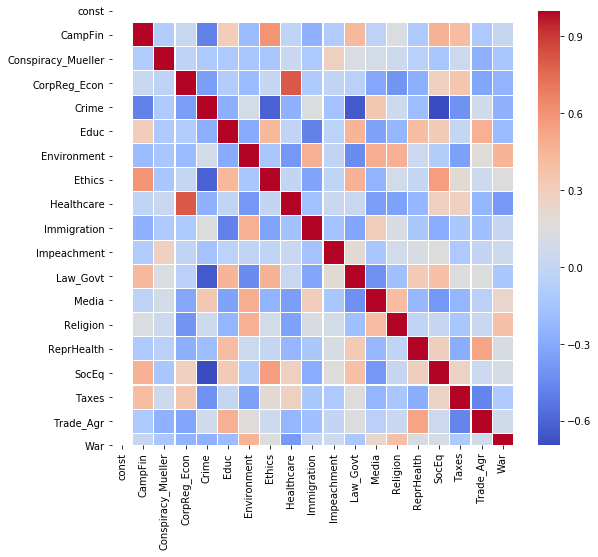

In [36]:
Hickenlooper_adj_baseline = sm.add_constant(x_3)
corrmat = Hickenlooper_adj_baseline.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1)

# Regression
#### Recommend naming variables per candidate as in steyer_baseline instead of just baseline
#### Adjust first line for model without a constant(intercept)

In [37]:
Hickenlooper_adj_baseline = sm.add_constant(x_3)
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_baseline)
res = mod.fit()
res.summary()
# This is the baseline model with all variables

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     14.61
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           3.71e-27
Time:                        18:09:42   Log-Likelihood:                 663.04
No. Observations:                 211   AIC:                            -1288.
Df Residuals:                     192   BIC:                            -1224.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1196      0.226     -0.529      0.598      -0.566       0.326
CampFin                1.5892     13.584      0.117      0.907     -25.204      28.382
Conspiracy_Mueller     1.1492      0.336      3.421      0.001       0.487       1.812
CorpReg_Econ           1.3242      0.339      3.910      0.000       0.656       1.992
Crime                  0.9303      0.285      3.261      0.001       0.368       1.493
Educ                   1.1442      0.338      3.388      0.001       0.478       1.810
Environment           -0.2758      0.365     -0.756      0.450      -0.995       0.443
Ethics                 0.3564      0.574      0.621      0.535      -0.775       1.488
Healthcare             0.2619      0.405      0.646      0.519      -0.538       1.062
Immigration            1.2275      0.382      3.210      0.002       0.473       1.982
Impeachment           -0.9268      4.807     -0.193      0.847     -10.409       8.556
Law_Govt               0.0373      0.274      0.136      0.892      -0.503       0.577
Media                 -0.1302      0.693     -0.188      0.851      -1.497       1.237
Religion               4.9383      1.702      2.901      0.004       1.581       8.296
ReprHealth            -0.1193      0.727     -0.164      0.870      -1.552       1.314
SocEq                  1.1145      0.561      1.987      0.048       0.008       2.221
Taxes                 -1.7612      0.669     -2.634      0.009      -3.080      -0.442
Trade_Agr              3.0379      1.703      1.783      0.076      -0.322       6.398
War                    0.2401      0.288      0.834      0.405      -0.327       0.808
==============================================================================
Omnibus:                       13.002   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.418
Skew:                           0.077   Prob(JB):                       0.0666
Kurtosis:                       2.230   Cond. No.                     1.91e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
try:
    notSig(res, .1)
except NameError as e:
    print(e)

name 'notSig' is not defined


In [39]:
Hickenlooper_adj_baseline

,const,CampFin,Conspiracy_Mueller,CorpReg_Econ,Crime,Educ,Environment,Ethics,Healthcare,Immigration,Impeachment,Law_Govt,Media,Religion,ReprHealth,SocEq,Taxes,Trade_Agr,War
0,1.0,0.000769,0.004563,0.146855,0.232009,0.029431,0.043050,0.033247,0.045513,0.020866,0.000803,0.077376,0.028813,0.005129,0.008211,0.057844,0.018946,0.004618,0.137491
1,1.0,0.000759,0.004615,0.148717,0.232443,0.030337,0.045295,0.034273,0.049725,0.018938,0.000795,0.073700,0.028056,0.005372,0.008817,0.059253,0.016270,0.004687,0.131489
2,1.0,0.000855,0.004671,0.156296,0.224032,0.032577,0.044459,0.035928,0.051954,0.017158,0.000787,0.072767,0.028484,0.004979,0.008642,0.062392,0.015111,0.004681,0.123727
3,1.0,0.000911,0.004799,0.163545,0.217572,0.033917,0.042369,0.036802,0.055124,0.015632,0.000783,0.072881,0.027347,0.004198,0.008171,0.063800,0.015524,0.004742,0.120570
4,1.0,0.000989,0.005239,0.166415,0.216606,0.034774,0.040973,0.037681,0.052608,0.015374,0.000783,0.074812,0.028382,0.003937,0.007832,0.065236,0.015990,0.004810,0.118776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,1.0,0.000790,0.003639,0.169420,0.228314,0.037141,0.039871,0.038701,0.060654,0.012725,0.000930,0.071353,0.027588,0.004175,0.008131,0.067744,0.010268,0.005093,0.119354
207,1.0,0.000824,0.003750,0.167301,0.226908,0.036628,0.039343,0.038638,0.060268,0.013004,0.000947,0.074035,0.027656,0.004280,0.007791,0.066640,0.010183,0.005123,0.121986
208,1.0,0.000836,0.003647,0.165337,0.228877,0.036732,0.039664,0.038146,0.058303,0.013020,0.000929,0.075907,0.027601,0.004152,0.007835,0.065861,0.009934,0.005200,0.120349
209,1.0,0.000918,0.003570,0.159741,0.233394,0.036323,0.042778,0.037251,0.054654,0.013321,0.001021,0.072484,0.029180,0.004755,0.008171,0.065438,0.009472,0.005480,0.124219


### Fill in columns to drop

In [40]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Religion'], axis = 1)

In [41]:
Hickenlooper_adj_final_1 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_1)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     14.42
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.55e-26
Time:                        18:09:43   Log-Likelihood:                 658.51
No. Observations:                 211   AIC:                            -1281.
Df Residuals:                     193   BIC:                            -1221.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1132      0.230     -0.491      0.624      -0.568       0.341
CampFin                9.9353     13.529      0.734      0.464     -16.748      36.618
Conspiracy_Mueller     1.2165      0.341      3.562      0.000       0.543       1.890
CorpReg_Econ           1.0866      0.335      3.245      0.001       0.426       1.747
Crime                  0.9507      0.291      3.272      0.001       0.378       1.524
Educ                   0.9349      0.336      2.780      0.006       0.272       1.598
Environment            0.0775      0.350      0.221      0.825      -0.613       0.768
Ethics                 0.5181      0.582      0.891      0.374      -0.629       1.665
Healthcare             0.5342      0.402      1.329      0.185      -0.258       1.327
Immigration            1.1420      0.389      2.939      0.004       0.376       1.908
Impeachment            0.3488      4.878      0.071      0.943      -9.273       9.971
Law_Govt               0.0145      0.279      0.052      0.959      -0.536       0.565
Media                  0.0671      0.703      0.096      0.924      -1.319       1.453
ReprHealth             0.0174      0.739      0.024      0.981      -1.440       1.475
SocEq                  1.1642      0.571      2.038      0.043       0.037       2.291
Taxes                 -1.6175      0.680     -2.380      0.018      -2.958      -0.277
Trade_Agr              3.0750      1.736      1.772      0.078      -0.349       6.499
War                    0.2740      0.293      0.935      0.351      -0.304       0.852
==============================================================================
Omnibus:                       14.376   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.390
Skew:                           0.175   Prob(JB):                       0.0410
Kurtosis:                       2.223   Cond. No.                     1.86e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['ReprHealth'], axis = 1)

In [43]:
Hickenlooper_adj_final_2 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     15.40
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.14e-26
Time:                        18:09:43   Log-Likelihood:                 658.51
No. Observations:                 211   AIC:                            -1283.
Df Residuals:                     194   BIC:                            -1226.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1114      0.217     -0.513      0.608      -0.539       0.317
CampFin                9.8529     13.036      0.756      0.451     -15.857      35.563
Conspiracy_Mueller     1.2149      0.334      3.642      0.000       0.557       1.873
CorpReg_Econ           1.0842      0.319      3.404      0.001       0.456       1.712
Crime                  0.9484      0.272      3.481      0.001       0.411       1.486
Educ                   0.9355      0.334      2.799      0.006       0.276       1.595
Environment            0.0765      0.347      0.221      0.826      -0.607       0.760
Ethics                 0.5114      0.506      1.012      0.313      -0.486       1.508
Healthcare             0.5321      0.391      1.361      0.175      -0.239       1.303
Immigration            1.1400      0.378      3.015      0.003       0.394       1.886
Impeachment            0.3302      4.802      0.069      0.945      -9.141       9.801
Law_Govt               0.0133      0.273      0.049      0.961      -0.526       0.552
Media                  0.0647      0.694      0.093      0.926      -1.303       1.433
SocEq                  1.1668      0.559      2.087      0.038       0.064       2.269
Taxes                 -1.6228      0.641     -2.533      0.012      -2.886      -0.359
Trade_Agr              3.0812      1.712      1.800      0.073      -0.295       6.457
War                    0.2724      0.285      0.957      0.340      -0.289       0.834
==============================================================================
Omnibus:                       14.442   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.408
Skew:                           0.175   Prob(JB):                       0.0406
Kurtosis:                       2.222   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Ethics'], axis = 1)

In [45]:
Hickenlooper_adj_final_3 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_3)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     16.35
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           4.45e-27
Time:                        18:09:43   Log-Likelihood:                 657.95
No. Observations:                 211   AIC:                            -1284.
Df Residuals:                     195   BIC:                            -1230.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0223      0.172      0.129      0.897      -0.317       0.362
CampFin               13.3884     12.559      1.066      0.288     -11.381      38.158
Conspiracy_Mueller     1.0532      0.293      3.597      0.000       0.476       1.631
CorpReg_Econ           0.9198      0.274      3.358      0.001       0.380       1.460
Crime                  0.7789      0.215      3.625      0.000       0.355       1.203
Educ                   0.8826      0.330      2.673      0.008       0.231       1.534
Environment            0.0561      0.346      0.162      0.871      -0.627       0.739
Healthcare             0.5278      0.391      1.350      0.179      -0.243       1.299
Immigration            0.9402      0.322      2.916      0.004       0.304       1.576
Impeachment           -0.5354      4.726     -0.113      0.910      -9.855       8.784
Law_Govt              -0.1209      0.239     -0.506      0.613      -0.592       0.350
Media                 -0.0571      0.683     -0.084      0.934      -1.404       1.290
SocEq                  1.0073      0.536      1.878      0.062      -0.051       2.065
Taxes                 -1.9185      0.570     -3.365      0.001      -3.043      -0.794
Trade_Agr              2.5989      1.644      1.581      0.116      -0.643       5.841
War                    0.1407      0.253      0.556      0.579      -0.359       0.640
==============================================================================
Omnibus:                       16.230   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.820
Skew:                           0.178   Prob(JB):                       0.0330
Kurtosis:                       2.194   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Law_Govt'], axis = 1)

In [47]:
Hickenlooper_adj_final_4 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_4)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     17.57
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.17e-27
Time:                        18:09:43   Log-Likelihood:                 657.82
No. Observations:                 211   AIC:                            -1286.
Df Residuals:                     196   BIC:                            -1235.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0523      0.089     -0.589      0.557      -0.227       0.123
CampFin               13.4820     12.534      1.076      0.283     -11.237      38.201
Conspiracy_Mueller     1.1184      0.262      4.261      0.000       0.601       1.636
CorpReg_Econ           1.0019      0.220      4.547      0.000       0.567       1.437
Crime                  0.8726      0.109      8.021      0.000       0.658       1.087
Educ                   0.9477      0.304      3.122      0.002       0.349       1.546
Environment            0.1213      0.321      0.378      0.706      -0.511       0.754
Healthcare             0.5543      0.387      1.433      0.154      -0.209       1.317
Immigration            1.0220      0.279      3.669      0.000       0.473       1.571
Impeachment           -0.6219      4.714     -0.132      0.895      -9.918       8.674
Media                 -0.0045      0.674     -0.007      0.995      -1.333       1.324
SocEq                  1.1385      0.469      2.429      0.016       0.214       2.063
Taxes                 -1.7770      0.496     -3.584      0.000      -2.755      -0.799
Trade_Agr              2.6013      1.641      1.585      0.114      -0.635       5.837
War                    0.2309      0.179      1.288      0.199      -0.123       0.585
==============================================================================
Omnibus:                       20.203   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.351
Skew:                           0.155   Prob(JB):                       0.0253
Kurtosis:                       2.139   Cond. No.                     1.73e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Media'], axis = 1)

In [49]:
Hickenlooper_adj_final_5 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_5)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     19.02
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.62e-28
Time:                        18:09:43   Log-Likelihood:                 657.82
No. Observations:                 211   AIC:                            -1288.
Df Residuals:                     197   BIC:                            -1241.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0524      0.088     -0.595      0.553      -0.226       0.121
CampFin               13.4512     11.610      1.159      0.248      -9.445      36.347
Conspiracy_Mueller     1.1180      0.255      4.380      0.000       0.615       1.621
CorpReg_Econ           1.0020      0.219      4.566      0.000       0.569       1.435
Crime                  0.8725      0.106      8.202      0.000       0.663       1.082
Educ                   0.9478      0.302      3.137      0.002       0.352       1.544
Environment            0.1205      0.297      0.406      0.686      -0.466       0.707
Healthcare             0.5541      0.385      1.440      0.151      -0.205       1.313
Immigration            1.0219      0.278      3.681      0.000       0.474       1.569
Impeachment           -0.6188      4.678     -0.132      0.895      -9.844       8.606
SocEq                  1.1391      0.458      2.490      0.014       0.237       2.041
Taxes                 -1.7768      0.494     -3.599      0.000      -2.750      -0.803
Trade_Agr              2.6017      1.636      1.590      0.113      -0.624       5.828
War                    0.2308      0.177      1.303      0.194      -0.119       0.580
==============================================================================
Omnibus:                       20.179   Durbin-Watson:                   0.144
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                7.346
Skew:                           0.154   Prob(JB):                       0.0254
Kurtosis:                       2.140   Cond. No.                     1.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Conspiracy_Mueller'], axis = 1)

In [51]:
Hickenlooper_adj_final_6 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_6)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     17.40
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           3.73e-25
Time:                        18:09:43   Log-Likelihood:                 648.01
No. Observations:                 211   AIC:                            -1270.
Df Residuals:                     198   BIC:                            -1226.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1793      0.074      2.438      0.016       0.034       0.324
CampFin          1.1426     11.771      0.097      0.923     -22.070      24.355
CorpReg_Econ     0.6599      0.214      3.079      0.002       0.237       1.082
Crime            0.6244      0.094      6.637      0.000       0.439       0.810
Educ             0.6370      0.307      2.076      0.039       0.032       1.242
Environment      0.3708      0.305      1.217      0.225      -0.230       0.972
Healthcare       0.7218      0.400      1.804      0.073      -0.067       1.511
Immigration      0.5018      0.262      1.914      0.057      -0.015       1.019
Impeachment      1.8201      4.853      0.375      0.708      -7.750      11.390
SocEq            0.3811      0.443      0.861      0.390      -0.492       1.254
Taxes           -2.0517      0.512     -4.010      0.000      -3.061      -1.043
Trade_Agr        0.2208      1.612      0.137      0.891      -2.958       3.400
War             -0.1022      0.167     -0.611      0.542      -0.432       0.227
==============================================================================
Omnibus:                       13.161   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.724
Skew:                           0.127   Prob(JB):                       0.0572
Kurtosis:                       2.234   Cond. No.                     1.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['War'], axis = 1)

In [53]:
Hickenlooper_adj_final_7 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_7)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     19.01
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           9.92e-26
Time:                        18:09:44   Log-Likelihood:                 647.81
No. Observations:                 211   AIC:                            -1272.
Df Residuals:                     199   BIC:                            -1231.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1499      0.056      2.699      0.008       0.040       0.259
CampFin          2.3304     11.591      0.201      0.841     -20.527      25.187
CorpReg_Econ     0.6892      0.209      3.305      0.001       0.278       1.100
Crime            0.6544      0.080      8.169      0.000       0.496       0.812
Educ             0.7143      0.279      2.559      0.011       0.164       1.265
Environment      0.2967      0.279      1.063      0.289      -0.254       0.847
Healthcare       0.7562      0.395      1.912      0.057      -0.024       1.536
Immigration      0.5737      0.234      2.452      0.015       0.112       1.035
Impeachment      2.3991      4.752      0.505      0.614      -6.972      11.770
SocEq            0.3964      0.441      0.899      0.370      -0.474       1.266
Taxes           -2.0288      0.509     -3.983      0.000      -3.033      -1.024
Trade_Agr        0.2284      1.610      0.142      0.887      -2.946       3.402
==============================================================================
Omnibus:                       12.544   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.613
Skew:                           0.132   Prob(JB):                       0.0604
Kurtosis:                       2.246   Cond. No.                     1.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['CampFin'], axis = 1)

In [55]:
Hickenlooper_adj_final_8 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_8)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Hickenlooper_adj   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     21.01
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           2.14e-26
Time:                        18:09:44   Log-Likelihood:                 647.79
No. Observations:                 211   AIC:                            -1274.
Df Residuals:                     200   BIC:                            -1237.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1526      0.054      2.845      0.005       0.047       0.258
CorpReg_Econ     0.6852      0.207      3.309      0.001       0.277       1.094
Crime            0.6509      0.078      8.338      0.000       0.497       0.805
Educ             0.7215      0.276      2.612      0.010       0.177       1.266
Environment      0.2934      0.278      1.055      0.292      -0.255       0.842
Healthcare       0.7460      0.391      1.907      0.058      -0.025       1.517
Immigration      0.5675      0.231      2.453      0.015       0.111       1.024
Impeachment      2.1977      4.634      0.474      0.636      -6.940      11.336
SocEq            0.4184      0.426      0.981      0.328      -0.423       1.259
Taxes           -2.0098      0.499     -4.025      0.000      -2.995      -1.025
Trade_Agr        0.1710      1.580      0.108      0.914      -2.945       3.287
==============================================================================
Omnibus:                       13.099   Durbin-Watson:                   0.119
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.755
Skew:                           0.133   Prob(JB):                       0.0563
Kurtosis:                       2.236   Cond. No.                     6.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['CorpReg_Econ'], axis = 1)

KeyError: "['CorpReg'] not found in axis"

In [ ]:
Hickenlooper_adj_final_9 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_9)
res = mod.fit()
res.summary()

In [ ]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['SocEq'], axis = 1)

In [ ]:
Hickenlooper_adj_final_10 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_10)
res = mod.fit()
res.summary()

In [ ]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Immigration'], axis = 1)

In [ ]:
Hickenlooper_adj_final_11 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_11)
res = mod.fit()
res.summary()

In [ ]:
Hickenlooper_adj_baseline = Hickenlooper_adj_baseline.drop(['Impeachment'], axis = 1)

In [ ]:
Hickenlooper_adj_final_12 = Hickenlooper_adj_baseline
mod = sm.OLS(Hickenlooper_adj, Hickenlooper_adj_final_12)
res = mod.fit()
res.summary()

In [ ]:
# Correlation Matrix of significant variables
Hickenlooper_adj_final_12.drop(['const'], axis = 1).corr()

In [ ]:
corrmat = Hickenlooper_adj_final_12.drop(['const'], axis = 1).corr()
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1)

In [ ]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(Hickenlooper_adj_final_12.values, i) 
               for i in range(Hickenlooper_adj_final_12.shape[1])], 
              index=Hickenlooper_adj_final_12.columns).sort_values()

### Repeat per candidate

In [ ]:
Gardner_adj_baseline = sm.add_constant(x_3)
mod = sm.OLS(Gardner_adj, Gardner_adj_baseline)
res = mod.fit()
res.summary()
# This is the baseline model with all variables

In [ ]:
notSig(res, .1)

In [ ]:
Gardner_adj_baseline

### Fill in columns to drop

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Religion'], axis = 1)

In [ ]:
Gardner_adj_final_1 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_1)
res = mod.fit()
res.summary()
#print(res.summary())
# This is the final model with significant variables remaining

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['ReprHealth'], axis = 1)

In [ ]:
Gardner_adj_final_2 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_2)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Ethics'], axis = 1)

In [ ]:
Gardner_adj_final_3 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_3)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Law_Govt'], axis = 1)

In [ ]:
Gardner_adj_final_4 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_4)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Media'], axis = 1)

In [ ]:
Gardner_adj_final_5 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_5)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Conspiracy_Mueller'], axis = 1)

In [ ]:
Gardner_adj_final_6 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_6)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['War'], axis = 1)

In [ ]:
Gardner_adj_final_7 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_7)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['CampFin'], axis = 1)

In [ ]:
Gardner_adj_final_8 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_8)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['CorpReg'], axis = 1)

In [ ]:
Gardner_adj_final_9 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_9)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['SocEq'], axis = 1)

In [ ]:
Gardner_adj_final_10 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_10)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Immigration'], axis = 1)

In [ ]:
Gardner_adj_final_11 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_11)
res = mod.fit()
res.summary()

In [ ]:
Gardner_adj_baseline = Gardner_adj_baseline.drop(['Impeachment'], axis = 1)

In [ ]:
Gardner_adj_final_12 = Gardner_adj_baseline
mod = sm.OLS(Gardner_adj, Gardner_adj_final_12)
res = mod.fit()
res.summary()

In [ ]:
# Correlation Matrix of significant variables
Gardner_adj_final_12.drop(['const'], axis = 1).corr()

In [ ]:
corrmat = Gardner_adj_final_12.drop(['const'], axis = 1).corr()
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="coolwarm", linewidths = 0.1)

In [ ]:
# Variance Inflation Factor of significant variables
pd.Series([variance_inflation_factor(Gardner_adj_final_12.values, i) 
               for i in range(Gardner_adj_final_12.shape[1])], 
              index=Gardner_adj_final_12.columns).sort_values()